<a href="https://colab.research.google.com/github/IgorRamos099/concrete_strength_forecast/blob/main/analise_resistencia_concreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dados_concreto_-_Sheet1.csv to dados_concreto_-_Sheet1.csv


Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

Carregando dados

In [ ]:
df = pd.read_csv('dados_concreto_-_Sheet1.csv')

print("Tamanho do dataset:", df.shape)
df.head()

Tamanho do dataset: (2029, 10)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


In [ ]:
# Correlação: quanto cada variável se relaciona com a Resistência
correlacao = df.corr(numeric_only=True)['Concrete compressive strength'].sort_values(ascending=False)
print(correlacao)

Concrete compressive strength    1.000000
Superplasticizer                 0.329791
Cement                           0.327826
Age                              0.290215
Blast Furnace Slag               0.106848
Fine Aggregate                  -0.015073
Coarse Aggregate                -0.017209
Water                           -0.057646
Fly Ash                         -0.089434
Name: Concrete compressive strength, dtype: float64


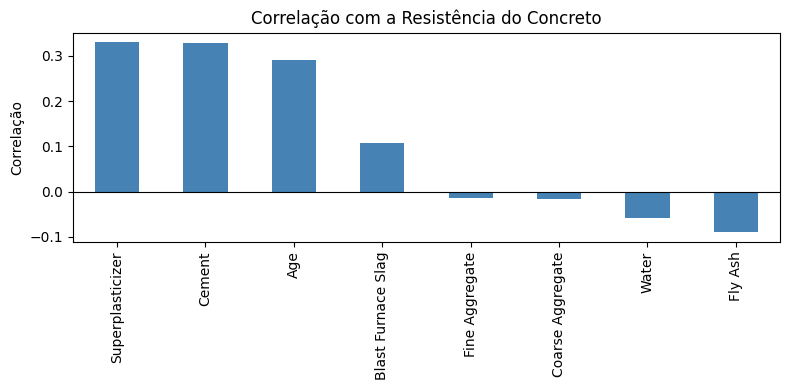

In [ ]:
# Visualizando como um gráfico de barras
correlacao.drop('Concrete compressive strength').plot(kind='bar', color='steelblue', figsize=(8, 4))
plt.title('Correlação com a Resistência do Concreto')
plt.ylabel('Correlação')
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

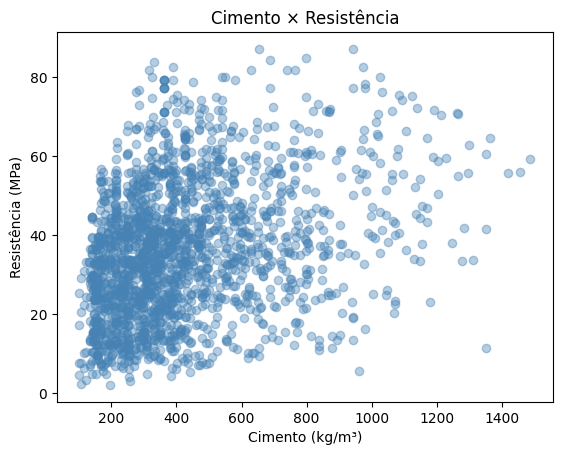

In [ ]:
# Como a quantidade de cimento afeta a resistência do concreto ?

plt.scatter(df['Cement'], df['Concrete compressive strength'], alpha=0.4, color='steelblue')
plt.title('Cimento × Resistência')
plt.xlabel('Cimento (kg/m³)')
plt.ylabel('Resistência (MPa)')
plt.show()

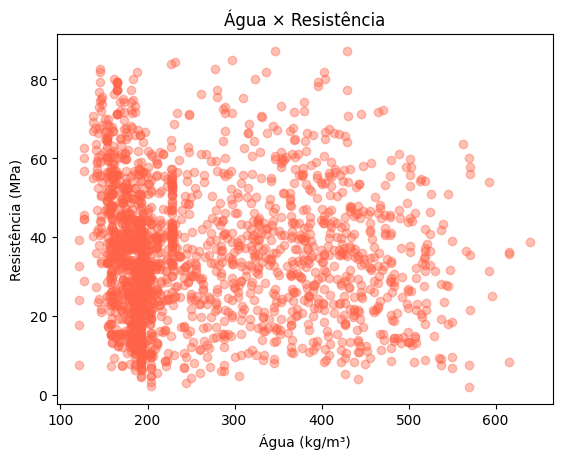

In [ ]:
# Como a água afeta a resistência do concreto?

plt.scatter(df['Water'], df['Concrete compressive strength'], alpha=0.4, color='tomato')
plt.title('Água × Resistência')
plt.xlabel('Água (kg/m³)')
plt.ylabel('Resistência (MPa)')
plt.show()

Strength Category
Alto     68.810265
Baixa    32.488236
Name: Concrete compressive strength, dtype: float64


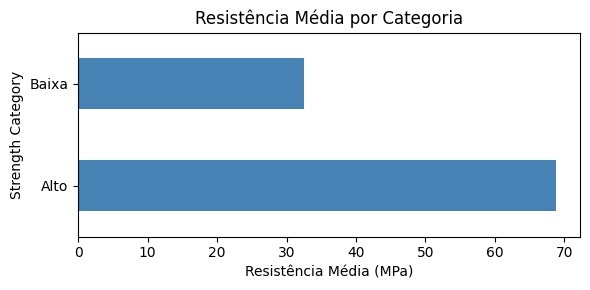

In [ ]:
# Qual é a resistência média do concreto por categoria de força?

media_por_categoria = df.groupby('Strength Category')['Concrete compressive strength'].mean()
print(media_por_categoria)

media_por_categoria.plot(kind='barh', color='steelblue', figsize=(6, 3))
plt.title('Resistência Média por Categoria')
plt.xlabel('Resistência Média (MPa)')
plt.tight_layout()
plt.show()

**Realizando tratamento de dados**

In [ ]:
# Verificando valores null

print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    9
Strength Category                0
dtype: int64


In [ ]:
# Removendo valores null

df = df.dropna()
print("Linhas após remover nulos:", len(df))

Linhas após remover nulos: 2020


In [ ]:
df = pd.get_dummies(df, columns=['Strength Category'], drop_first=True)
print("Colunas após encoding:")
print(df.columns.tolist())

Colunas após encoding:
['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength', 'Strength Category_Baixa']


**Construção e Avaliação de Modelos de Regressão**

In [ ]:
X = df.drop(columns=['Concrete compressive strength'])
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Amostras de treino:", len(X_train))
print("Amostras de teste:", len(X_test))

Amostras de treino: 1616
Amostras de teste: 404


In [ ]:
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

previsao_rf = modelo_rf.predict(X_test)

print("Random Forest:")
print("  R²  =", round(r2_score(y_test, previsao_rf), 4))
print("  MAE =", round(mean_absolute_error(y_test, previsao_rf), 4))

Random Forest:
  R²  = 0.8177
  MAE = 5.0085


In [ ]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

previsao_lr = modelo_lr.predict(X_test)

print("Regressão Linear:")
print("  R²  =", round(r2_score(y_test, previsao_lr), 4))
print("  MAE =", round(mean_absolute_error(y_test, previsao_lr), 4))

Regressão Linear:
  R²  = 0.5193
  MAE = 9.3446


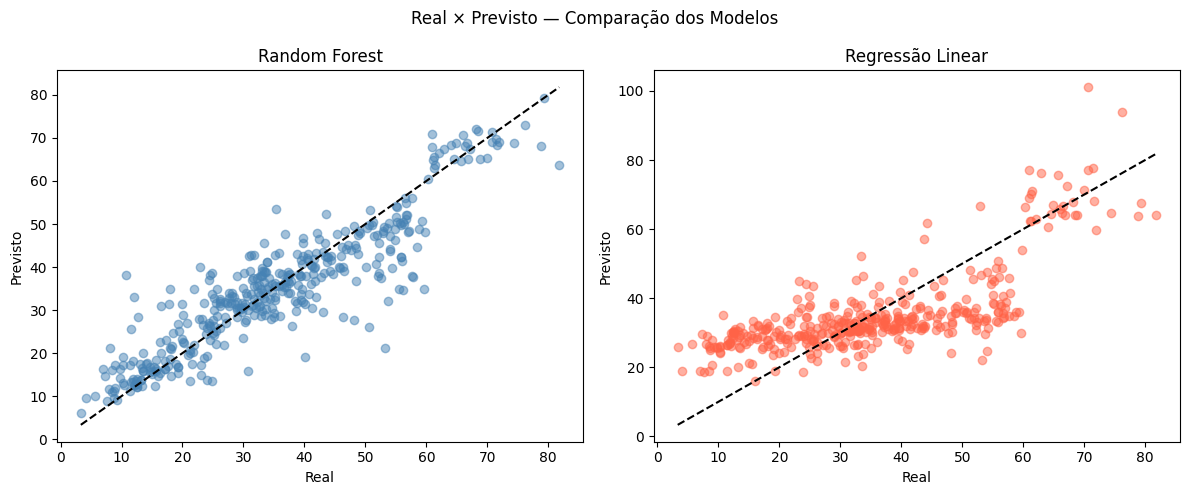

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, previsao, titulo, cor in zip(
    axes,
    [previsao_rf, previsao_lr],
    ['Random Forest', 'Regressão Linear'],
    ['steelblue', 'tomato']
):
    ax.scatter(y_test, previsao, alpha=0.5, color=cor)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    ax.set_title(titulo)
    ax.set_xlabel('Real')
    ax.set_ylabel('Previsto')

plt.suptitle('Real × Previsto — Comparação dos Modelos')
plt.tight_layout()
plt.show()

# O Random Forest teve R² maior e MAE menor — isso significa que ele erra menos e explica melhor a variação da resistência.
# A Regressão Linear só captura relações diretas, mas a resistência do concreto depende de combinações entre os ingredientes, por isso o Random Forest se sai melhor.

**Predizendo um resultado**

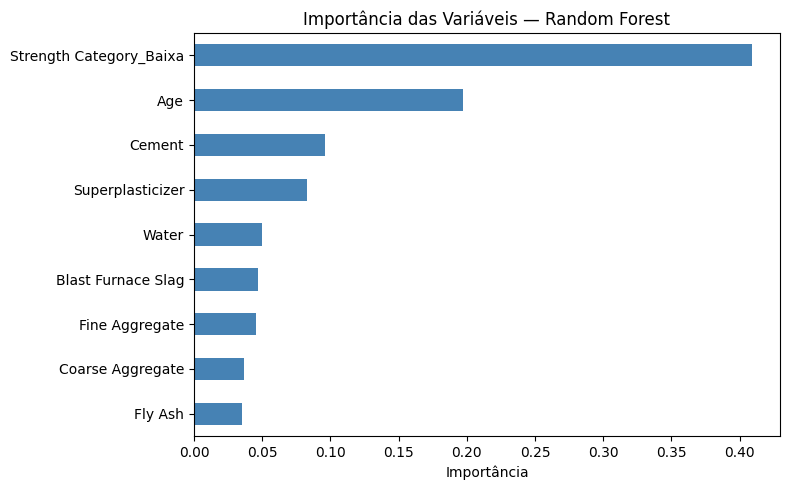

Strength Category_Baixa    0.409111
Age                        0.197403
Cement                     0.096318
Superplasticizer           0.083059
Water                      0.050030
Blast Furnace Slag         0.046700
Fine Aggregate             0.045698
Coarse Aggregate           0.036320
Fly Ash                    0.035361
dtype: float64


In [ ]:
# Analisando quais variáveis mais influenciam a previsão

importancia = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancia = importancia.sort_values(ascending=True)

importancia.plot(kind='barh', figsize=(8, 5), color='steelblue')
plt.title('Importância das Variáveis — Random Forest')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

print(importancia.sort_values(ascending=False))

In [ ]:
# Criando a nova mistura com os valores do desafio

nova_mistura = pd.DataFrame([{
    'Cement': 550,
    'Blast Furnace Slag': 150,
    'Fly Ash': 0,
    'Water': 180,
    'Superplasticizer': 2.5,
    'Coarse Aggregate': 1000,
    'Fine Aggregate': 700,
    'Age': 25
}])


nova_mistura = nova_mistura.reindex(columns=X.columns, fill_value=0)

resultado = modelo_rf.predict(nova_mistura)[0]

print(f"Resistência prevista: {resultado:.2f} MPa")

Resistência prevista: 72.12 MPa


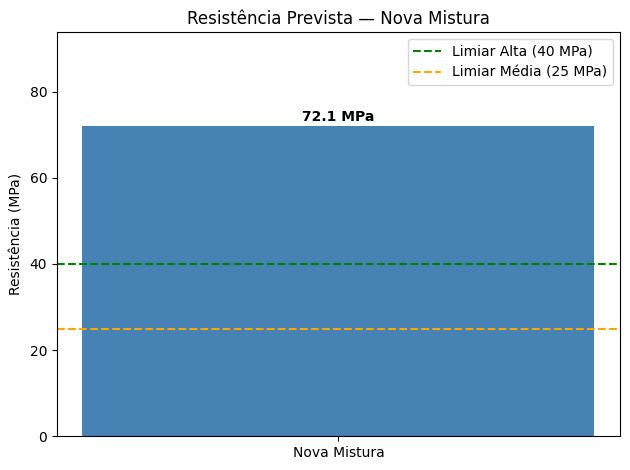

In [ ]:
# Visualizando o resultado

plt.bar(['Nova Mistura'], [resultado], color='steelblue', width=0.3)
plt.axhline(40, color='green', linestyle='--', label='Limiar Alta (40 MPa)')
plt.axhline(25, color='orange', linestyle='--', label='Limiar Média (25 MPa)')
plt.title('Resistência Prevista — Nova Mistura')
plt.ylabel('Resistência (MPa)')
plt.ylim(0, resultado * 1.3)
plt.text(0, resultado + 1, f'{resultado:.1f} MPa', ha='center', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()